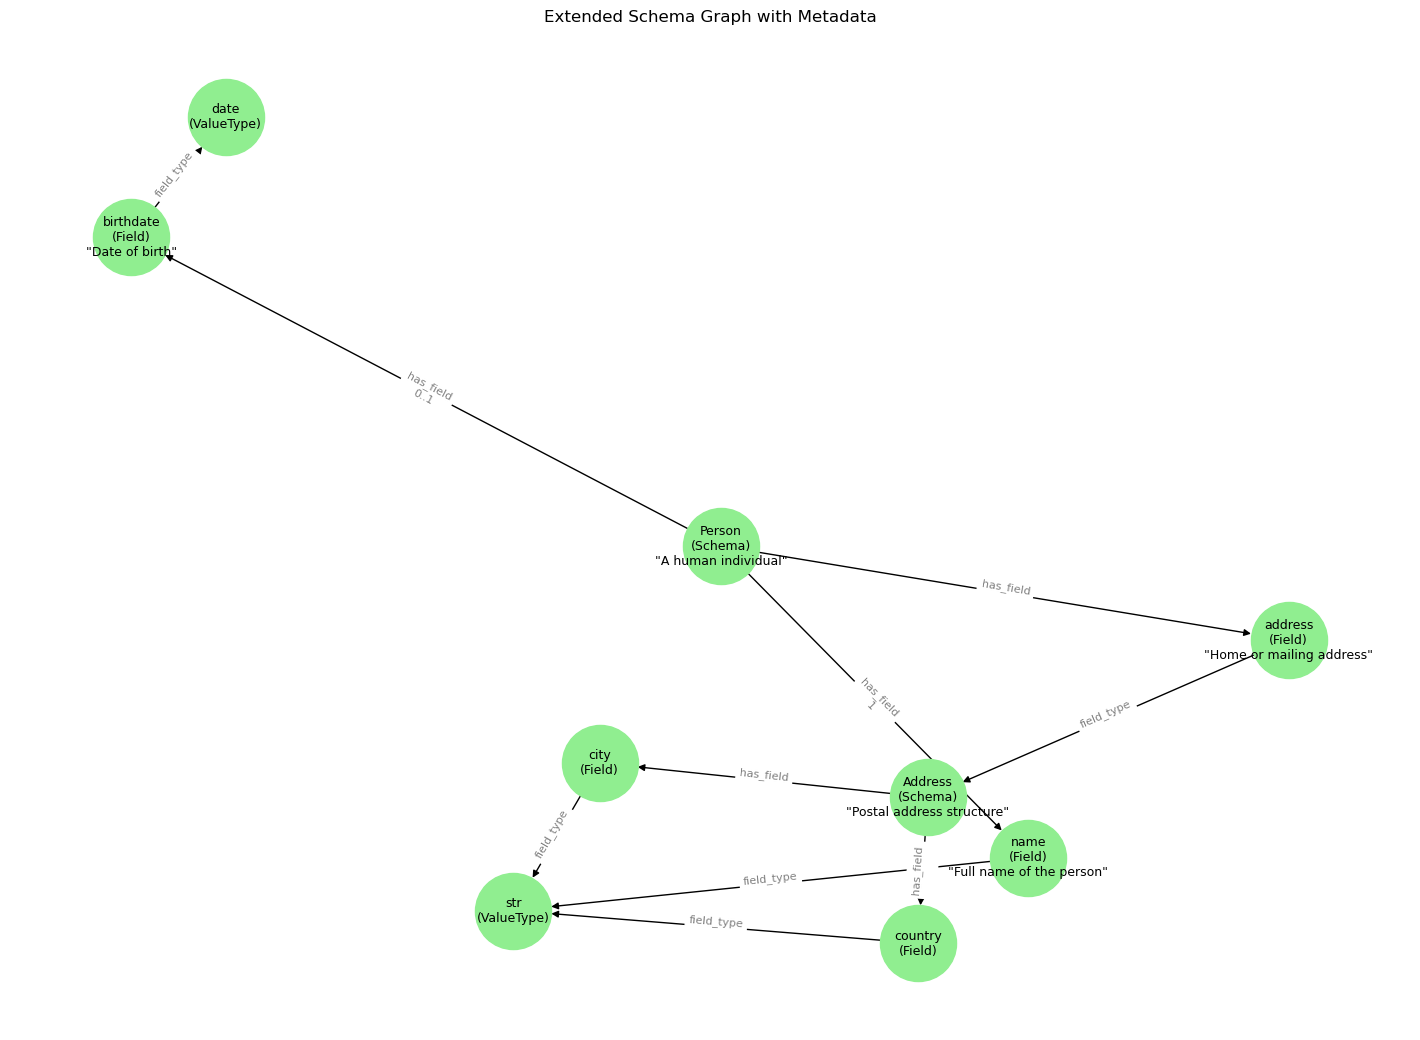

In [2]:
import json
import networkx as nx
import matplotlib.pyplot as plt
from typing import Dict, Any

# --- Extended Schema Graph with Metadata ---
extended_schema_graph = {
    "nodes": [
        {
            "id": "Person", "type": "Schema",
            "metadata": {"description": "A human individual"}
        },
        {
            "id": "name", "type": "Field",
            "metadata": {
                "description": "Full name of the person",
                "required": True,
                "example": "Ada Lovelace"
            }
        },
        {
            "id": "birthdate", "type": "Field",
            "metadata": {
                "description": "Date of birth",
                "required": False
            }
        },
        {
            "id": "address", "type": "Field",
            "metadata": {
                "description": "Home or mailing address"
            }
        },
        {
            "id": "Address", "type": "Schema",
            "metadata": {
                "description": "Postal address structure"
            }
        },
        {"id": "city", "type": "Field"},
        {"id": "country", "type": "Field"},
        {"id": "str", "type": "ValueType"},
        {"id": "date", "type": "ValueType"}
    ],
    "edges": [
        {
            "source": "Person", "target": "name", "label": "has_field",
            "metadata": {"cardinality": "1"}
        },
        {
            "source": "Person", "target": "birthdate", "label": "has_field",
            "metadata": {"cardinality": "0..1"}
        },
        {
            "source": "Person", "target": "address", "label": "has_field"
        },
        {"source": "name", "target": "str", "label": "field_type"},
        {"source": "birthdate", "target": "date", "label": "field_type"},
        {"source": "address", "target": "Address", "label": "field_type"},
        {"source": "Address", "target": "city", "label": "has_field"},
        {"source": "Address", "target": "country", "label": "has_field"},
        {"source": "city", "target": "str", "label": "field_type"},
        {"source": "country", "target": "str", "label": "field_type"}
    ]
}

# --- Functions ---

def load_schema_graph_with_metadata(schema_data: Dict[str, Any]) -> nx.DiGraph:
    """
    Load schema graph with metadata into a NetworkX DiGraph.
    """
    G = nx.DiGraph()

    for node in schema_data["nodes"]:
        G.add_node(node["id"], type=node["type"], metadata=node.get("metadata", {}))

    for edge in schema_data["edges"]:
        G.add_edge(edge["source"], edge["target"],
                   label=edge["label"], metadata=edge.get("metadata", {}))

    return G

def visualize_schema_graph_with_metadata(G: nx.DiGraph, title: str = "Schema Graph with Metadata"):
    """
    Visualize a schema graph including metadata in node labels.
    """
    plt.figure(figsize=(14, 10))
    pos = nx.spring_layout(G, seed=42)

    def make_node_label(n, d):
        meta = d.get("metadata", {})
        desc = meta.get("description", "")
        return f"{n}\n({d['type']})" + (f"\n\"{desc}\"" if desc else "")

    node_labels = {n: make_node_label(n, d) for n, d in G.nodes(data=True)}
    edge_labels = {(u, v): f"{d['label']}\n{d.get('metadata', {}).get('cardinality', '')}" for u, v, d in G.edges(data=True)}

    nx.draw(G, pos, with_labels=True, labels=node_labels,
            node_size=3000, node_color='lightgreen', font_size=9)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels,
                                 font_color='gray', font_size=8)

    plt.title(title)
    plt.axis('off')
    plt.show()

# --- Execution ---
G_extended = load_schema_graph_with_metadata(extended_schema_graph)
visualize_schema_graph_with_metadata(G_extended, title="Extended Schema Graph with Metadata")
